# Objective

The objective of this project is to use the Euro daily exchange rates to practice the creation of a visualisation using Python that tells a story.

The story that I have chosen to tell is how the EUR-USD exchange rate moved during the coronavirus pandemic.


# Data summary

This dataset has been sourced from Kaggle.com and can be found [here](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020). The user who provided this data is Daria Chemkaeva.

The dataset describes the Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union

The dataset is made up of two primary data types:
1. The `Period\Unit:` series shows date values for each row of data
2. All other series provide a relative exhcage rate for the name currency in relation to the Euro. For example, on 2021-05-06 1 euro would buy you 1.5547 Australian dollars (AUD)

Based on the data summary it is aparant that there some currencies have a missing values. However, rather than clean all of the data, for this project we are only going to focus on the Euro to US Dollar relationship, and will therefore only worry about the `Period\Unit:` series and the `US dollar ` series.

From the data summary we can also see that many of the series have been automatically read as an object when they should probably be read as a float64, however again we will only focus on the `US dollar ` series.

In [1]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


# Data cleaning

We will complete the following data cleaning steps.
1. Tidy up the names of the `Period\Unit:  ` series and the `US dollar ` series
2. Isolate the `Period\Unit:  ` series and the `US dollar ` series
3. Drop all rows where the `US dollar ` series does not contain a float64
4. Convert the `US dollar ` series to a float64

In [5]:
exchange_rates.rename(columns={'[US dollar ]' : 'US_dollar',
                              'Period\\Unit:' : 'Time'},
                     inplace=True)

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

In [6]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5781 non-null   datetime64[ns]
 1   [Australian dollar ]      5781 non-null   object        
 2   [Bulgarian lev ]          5379 non-null   object        
 3   [Brazilian real ]         5513 non-null   object        
 4   [Canadian dollar ]        5781 non-null   object        
 5   [Swiss franc ]            5781 non-null   object        
 6   [Chinese yuan renminbi ]  5513 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           5781 non-null   object        
 9   [Danish krone ]           5781 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      5781 non-null   object        
 12  [Greek drachma ]    

In [7]:
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [9]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3532     6
          ..
1.4358     1
0.9668     1
1.3279     1
1.1855     1
1.0975     1
Name: US_dollar, Length: 3549, dtype: int64

In [10]:
# drop all 62 rows with "-" and convert to float

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5719 non-null   datetime64[ns]
 1   US_dollar  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


# Data Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

#enables Jupyter to display graphs

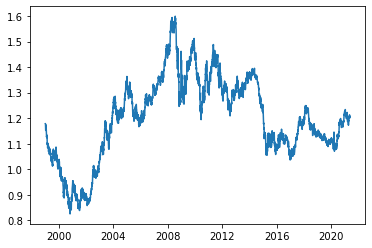

In [15]:
plt.plot(euro_to_dollar['Time'],
        euro_to_dollar['US_dollar'])

plt.show()

In [17]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

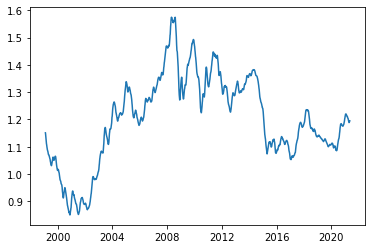

In [18]:
plt.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean'])

plt.show()

## Plan
Show the impact of the corona virus pandemic during 2020 in relation to the preceding three years (2017, 2018 and 2019

Defined ranges:
1. `corona` Corona virus range starts at 30 January 2020 as this is the date at which the World Health Organization (WHO)eclared the COVID-19 outbreak a global health emergency. The range goes to the end of the dataset, which is 6 May 2021
2. `pre_corona` The pre-corona range starts at 1 January 2017 and ends at 29 January 2020
3. `combined` is a range between 1 January 2017 and 6 May 2021

In [19]:
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5776,2021-04-30,1.2082,1.192843
5777,2021-05-03,1.2044,1.193283
5778,2021-05-04,1.2021,1.193717
5779,2021-05-05,1.2005,1.193980
5780,2021-05-06,1.2060,1.194570


In [30]:
# create ranges

combined = euro_to_dollar.copy(
                            )[(euro_to_dollar['Time'] >= '2017-01-01'
                              ) & (euro_to_dollar['Time'] <= '2021-05-06')]

corona = euro_to_dollar.copy(
                            )[(euro_to_dollar['Time'] >= '2020-01-30'
                              ) & (euro_to_dollar['Time'] <= '2021-05-06')]

pre_corona = euro_to_dollar.copy(
                            )[(euro_to_dollar['Time'] >= '2017-01-01'
                              ) & (euro_to_dollar['Time'] < '2020-01-30')]

In [31]:
combined.head()

,Time,US_dollar,rolling_mean
4672,2017-01-02,1.0465,1.055517
4673,2017-01-03,1.0385,1.054697
4674,2017-01-04,1.0437,1.054097
4675,2017-01-05,1.0501,1.053760
4676,2017-01-06,1.0589,1.053897


In [33]:
corona.head()

,Time,US_dollar,rolling_mean
5457,2020-01-30,1.1029,1.111260
5458,2020-01-31,1.1052,1.110893
5459,2020-02-03,1.1066,1.110730
5460,2020-02-04,1.1048,1.110500
5461,2020-02-05,1.1023,1.110253


In [34]:
pre_corona.head()

,Time,US_dollar,rolling_mean
4672,2017-01-02,1.0465,1.055517
4673,2017-01-03,1.0385,1.054697
4674,2017-01-04,1.0437,1.054097
4675,2017-01-05,1.0501,1.053760
4676,2017-01-06,1.0589,1.053897


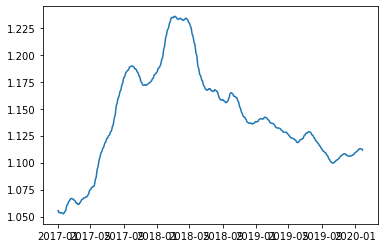

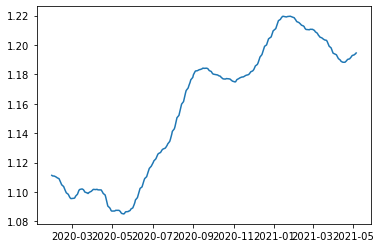

In [35]:
plt.plot(pre_corona['Time'],
        pre_corona['rolling_mean'])

plt.show()

plt.plot(corona['Time'],
        corona['rolling_mean'])

plt.show()

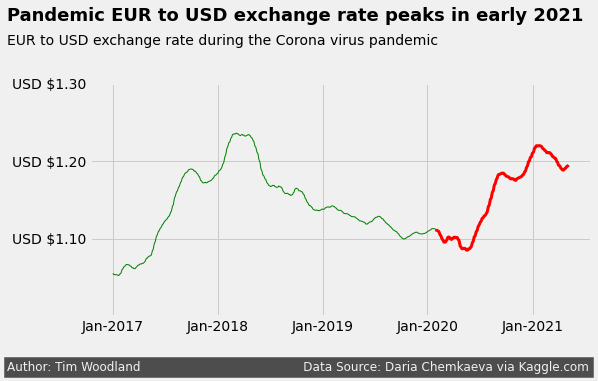

In [102]:
import matplotlib.style as style
style.use('fivethirtyeight')

import matplotlib.dates as mdates

#add the plot
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(combined['Time'],
        combined['rolling_mean'],
       linewidth=1, color='green')

#highlight the corona virus period
ax.plot(corona['Time'],
        corona['rolling_mean'],
       linewidth=3, color='red')

#set y range
ax.set_ylim(1,1.3)

#replace y tick labels
ax.set_yticks([1.10,1.20,1.30])
ax.set_yticklabels(['USD $1.10','USD $1.20','USD $1.30'])

#set x tick labels
fmt_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

#major title
ax.text(16800,1.38,
       'Pandemic EUR to USD exchange rate peaks in early 2021',
       size=18, weight='bold')

#minor title
ax.text(16800,1.35,
       'EUR to USD exchange rate during the Corona virus pandemic',
       size=14)

#credits bar
ax.text(16800, 0.93, 'Author: Tim Woodland' + ' '*42 + 'Data Source: Daria Chemkaeva via Kaggle.com',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12)

plt.show()

#Find tick range for coordinates
#ax.get_xticks()
#ax.get_yticks()